# Trying to do vector interpolation
stough


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import matplotlib.colors as mcolors

from scipy import interpolate

In [2]:
# Make a function that given an array of data Nxd, returns the associated 
# list of colors for plotting, based on the order of the data, N x 3
def get_colors(data):
    first = np.array([1,0,0])
    last = np.array([0,1,0])
    colmap = lambda alpha: (1-alpha)*first + alpha*last
    return np.vstack([colmap(x) for x in np.linspace(0,1,len(data))])

In [3]:
get_colors(np.arange(10)), get_colors(np.arange(10)).shape

(array([[1.        , 0.        , 0.        ],
        [0.88888889, 0.11111111, 0.        ],
        [0.77777778, 0.22222222, 0.        ],
        [0.66666667, 0.33333333, 0.        ],
        [0.55555556, 0.44444444, 0.        ],
        [0.44444444, 0.55555556, 0.        ],
        [0.33333333, 0.66666667, 0.        ],
        [0.22222222, 0.77777778, 0.        ],
        [0.11111111, 0.88888889, 0.        ],
        [0.        , 1.        , 0.        ]]),
 (10, 3))

In [4]:
v0 = np.array([0,1])
v1 = np.array([1,0])

vs = np.array([v0,v1])
vs

array([[0, 1],
       [1, 0]])

In [5]:
vs[:,0]

array([0, 1])

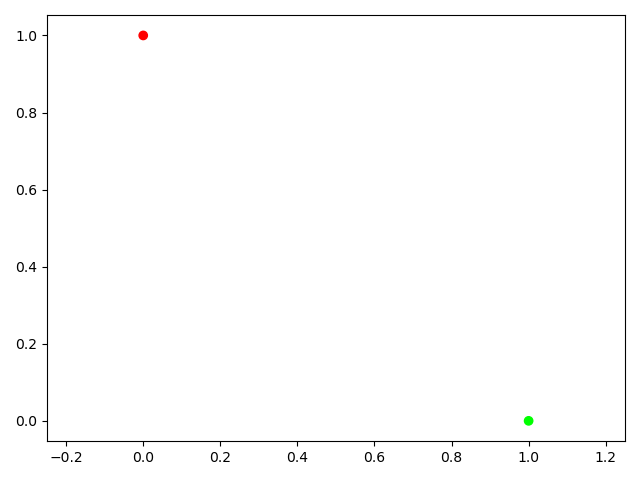

In [6]:
plt.figure()
plt.scatter(vs[:,0], vs[:,1], c=get_colors(vs))
plt.axis('equal')
plt.tight_layout()

In [7]:
lin2d = lambda alpha: (1-alpha)*v0 + alpha*v1

In [8]:
lin2d(.5)

array([0.5, 0.5])

In [9]:
points = np.vstack([lin2d(x) for x in np.arange(0,1,.01)])

In [10]:
points.shape

(100, 2)

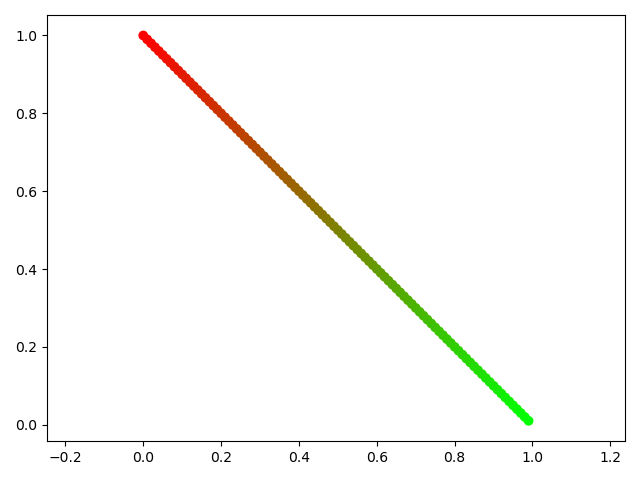

In [11]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=get_colors(points))
plt.axis('equal')
plt.tight_layout()

In [12]:
# Thank you: https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates

import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    # return(rho, phi)
    return np.vstack([rho, phi]).T

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    # return(x, y)
    return np.vstack([x, y]).T

In [13]:
cart2pol(vs[:,0], vs[:, 1])

array([[1.        , 1.57079633],
       [1.        , 0.        ]])

In [14]:
180*1.57/np.pi

89.95437383553926

In [15]:
polvs = cart2pol(vs[:,0], vs[:, 1])

In [16]:
polvs[0]

array([1.        , 1.57079633])

In [17]:
pol2cart(polvs[:,0], polvs[:,1])

array([[6.123234e-17, 1.000000e+00],
       [1.000000e+00, 0.000000e+00]])

In [18]:
polinterp = lambda alpha: (1-alpha)*polvs[0] + alpha*polvs[1]

In [19]:
polpoints = np.vstack([polinterp(x) for x in np.arange(0,1,.01)])

In [20]:
polpoints

array([[1.        , 1.57079633],
       [1.        , 1.55508836],
       [1.        , 1.5393804 ],
       [1.        , 1.52367244],
       [1.        , 1.50796447],
       [1.        , 1.49225651],
       [1.        , 1.47654855],
       [1.        , 1.46084058],
       [1.        , 1.44513262],
       [1.        , 1.42942466],
       [1.        , 1.41371669],
       [1.        , 1.39800873],
       [1.        , 1.38230077],
       [1.        , 1.3665928 ],
       [1.        , 1.35088484],
       [1.        , 1.33517688],
       [1.        , 1.31946891],
       [1.        , 1.30376095],
       [1.        , 1.28805299],
       [1.        , 1.27234502],
       [1.        , 1.25663706],
       [1.        , 1.2409291 ],
       [1.        , 1.22522113],
       [1.        , 1.20951317],
       [1.        , 1.19380521],
       [1.        , 1.17809725],
       [1.        , 1.16238928],
       [1.        , 1.14668132],
       [1.        , 1.13097336],
       [1.        , 1.11526539],
       [1.

In [21]:
points2 = pol2cart(polpoints[:,0], polpoints[:,1])

In [22]:
points2.shape

(100, 2)

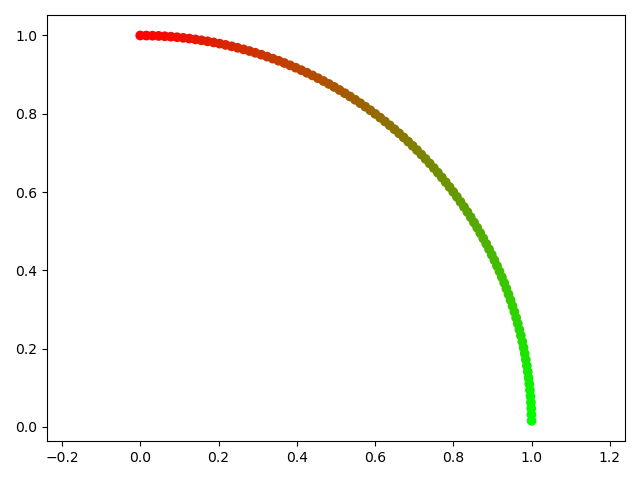

In [23]:
plt.figure()
plt.scatter(points2[:,0], points2[:,1], c=get_colors(points2))
plt.axis('equal')
plt.tight_layout()

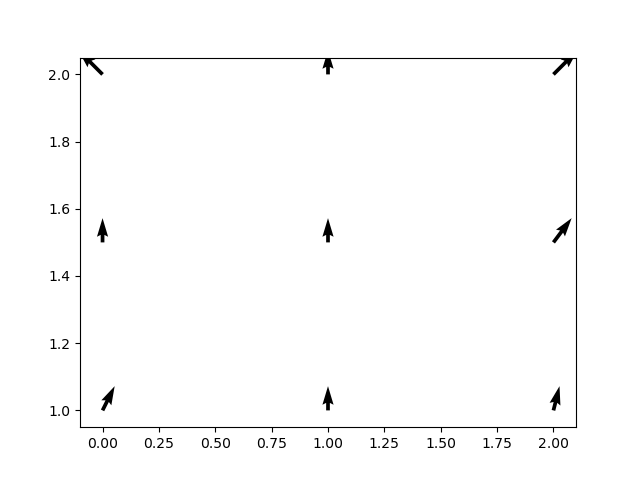

In [24]:
import matplotlib.pyplot as plt, numpy as np
x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]
plt.figure()
plt.quiver(x, y, u, v)
plt.show()


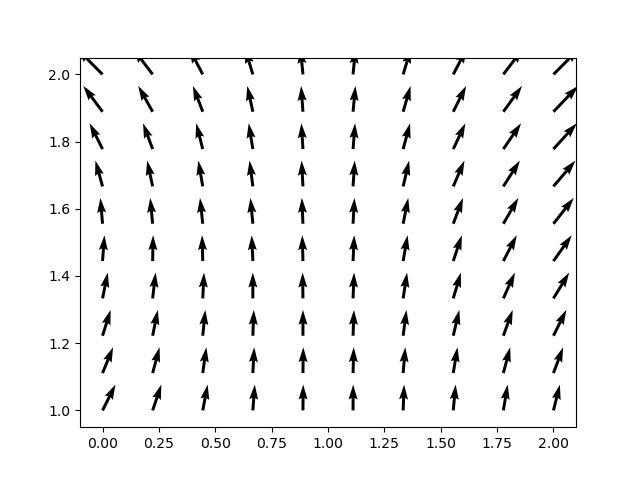

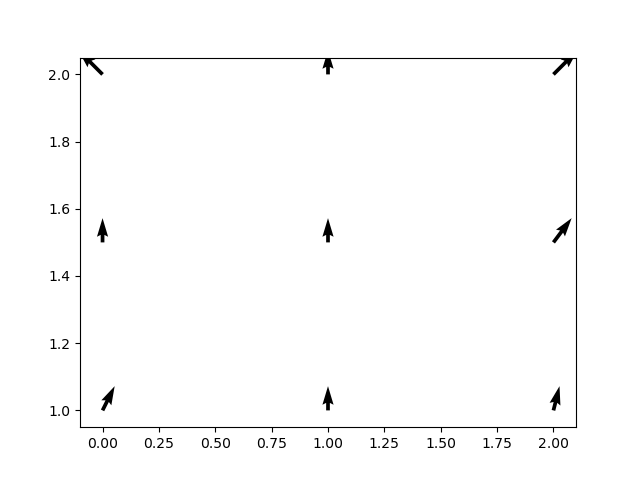

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure()
plt.quiver(x, y, u, v)

xx = np.linspace(0, 2, 10)
yy = np.linspace(1, 2, 10)
xx, yy = np.meshgrid(xx, yy)

points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic')
v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic')

plt.figure()
plt.quiver(xx, yy, u_interp, v_interp) # format 
plt.show()